# Primeros Pasos en TensorFlow
### Basado en  en Google --> ML Crash Course intro_TensoFlow
https://colab.research.google.com/notebooks/mlcc/first_steps_with_tensor_flow.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=firststeps-colab&hl=en#scrollTo=Bd2Zkk1LE2Zr

**Objetivos de Aprendizaje:**
  * Aprender conceptos fundamentales de TensorFlow
  * Utilizar la clase `LinearRegressor` de TensorFlow para predecir el precio medio de casa en el mercado, con detalle a nivel de bloques, y basado en una sola caracteristica
  * Evaluar la exactitud de las predicciones del modelo usando RMSE (Root Mean Square Error) Raiz Cuadrada del Error Cuadratico Medio
  * Mejorar la exactitud del model ajustando sus hiperparametros
  
  Los datos [data](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) estan basados en el censo de 1990 de California.
  

## 1.0 Ambiente Inicial

** Verifique que el Kernel de este libro es Python 2.7 or <= 3.6.   Python 3.6 no tiene soporte de TensorFlow en este momento (11/2018) **

En la primera celda vamos a cargar las librerias necesarias correspondientes a TF y otras dependencias:
   

In [1]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


### 2.1 Los Datos
#### 2.1.1. Carga de datos
Ahora cargando los datos (data set) para el ejemplo:

In [2]:
# Cargando los datos
cal_casas_dataframe = pd.read_csv("./california_housing_train.csv", sep=",")
cal_casas_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207300.9
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,115983.8
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119400.0
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180400.0
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265000.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500001.0


#### 2.1.2. Cambiando el orden de los datos
Vamos a reorganizar los datos para estar seguros que no existe ningun efecto segundario que pueda afectar los resultados de aplicar Stochastic Gradient Descent.
Adicionalment, cambiaremos la escala de 'mediam_house_value' para que sea en miles; esto facilita el proceso de aprendizaje con ratas de aprendizaje en el rango que normalmente se utilizan.


In [3]:
# Reindex con random.permuation para cambiar el orden de los datos
cal_casas_dataframe = cal_casas_dataframe.reindex(
    np.random.permutation(cal_casas_dataframe.index))
# divide por 1000
cal_casas_dataframe["median_house_value"] /= 1000.0
# lista los primeros 5 y los ultimos 5 de la tabla de datos
cal_casas_dataframe


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16211,-122.5,37.8,52.0,1647.0,236.0,546.0,227.0,9.2,500.0
1263,-117.1,32.7,16.0,6075.0,1816.0,2592.0,1634.0,2.6,178.1
6429,-118.3,33.8,21.0,2188.0,706.0,2265.0,652.0,2.0,164.7
11023,-121.0,37.6,43.0,1561.0,354.0,862.0,332.0,1.8,81.5
4316,-118.0,33.8,31.0,1960.0,380.0,1356.0,356.0,4.1,225.9
...,...,...,...,...,...,...,...,...,...
12438,-121.6,39.8,12.0,1958.0,369.0,875.0,354.0,2.4,97.6
4893,-118.1,34.0,40.0,1743.0,328.0,981.0,291.0,3.7,173.1
12295,-121.5,38.5,37.0,1902.0,413.0,955.0,384.0,3.1,96.8
8088,-118.4,33.9,43.0,1584.0,477.0,799.0,433.0,5.0,435.0


#### 2.1.3. Examinando los datos
Es buena idea familiarizarse con los datos antes de trabajar con ellos.  Pandas permite el uso de una funcion que provee valiosa informacion estadistica de la tabla de datos: count of examples, mean, standard deviation, max, min, and otras cualidades.

In [4]:
cal_casas_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


## 3.0 El Primer Modelo

el objetivo del modelo es predcir `median_hose_value`, el cual sera nuestro label (tambien llamado objetivo).  Usaremos `total_rooms` como nuestra unica caracteristica.
** Nota:** los datos son al nivel de bloque de la ciudad, asi que la observacion representa el numero total de habitaciones en ese bloque.

Para entrenar el modelo, usaremos la interface de regresion lineal [LinearRegressor](https://www.tensorflow.org/api_docs/python/tf/estimator/LinearRegressor) del Estimator de TensorFlow [Estimator](https://www.tensorflow.org/get_started/estimator).  Este API se hace cargo de la mayoria del codigo de bajo-nivel, y expone metodos convenientes para ejecutar el entrenamiento del modelo, la evaluacion, y finalmente la inferencia.



### 3.1. Paso 1 - Definir las categorias y configurar las columnas 
Para importar los datos de entreanmiento en TF, necesitamos especificar el tipo de datos en cada categoria. Existen dos tipos de datos que usaremos:

* **Datos Categoricos**: Datos que son textuales. Nuestros datos no contienen una columna de este tipo.
* **Datos Numericos**: Datos que son numeros (enteros o flotantes) y que se quieren manipular como numeros. Existen casos, como el de zona postal, donde probablemente se quiere manejar un dato numerico como categorico

En TF, se indica el tipo de datos utilizando una llamada a la funciion **feature column**.  Feature Columns almacenan solo la descripcion de los datos observados; no contienen el valor de la observacion misma.

Para empezar, utilicemos solo una observacion numerica, `total_rooms`.  El siguiente codigo extrae los datos de `total_rooms` de el DataFrame cal_casas_dataframe y define la columna de la observacion usando `numeric_column`, para el tipo de dato numerico:



In [5]:
# Define la observacion de entrada: total_rooms.
my_feature = cal_casas_dataframe[["total_rooms"]]

# Configura una columna de observacion numerica para el total de habitaciones
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

**NOTA:** Los datos de "total_rooms" es un arreglo uni-dimensional (lista de numero total de habitaciones en cada bloque). 
The shape of our total_rooms data is a one-dimensional array (a list of the total number of rooms for each block). 

### 3.2. Paso 2 - Defina el objetivo
Lo siguiente es definir el objetivo, que es el valor que queremos estimar: median_house_value. De nuevo, extrayendo el valor de nuestro dataframe:

In [6]:
# Define la etiqueta
targets = cal_casas_dataframe["median_house_value"]

### 3.3 Configurar la Regresion Lineal (LinearRegressor de TF)
Lo siguiente es configurar el modelo de regresion lineal usando LinearRegressor.  Entrenaremos el modelo utilizando `GradientDescentOptimizer`, que implementa Mini-Batch Stovchastic Gradient Descent (SGD). La rata de aprendizaje (`learning_rate`) controla el tamano de cada paso.

**NOTA:** Para estar seguros, tambien aplicamos [gradient clipping](https://developers.google.com/machine-learning/glossary/#gradient_clipping) a nuestro optimizador via `clip_gradients_by_norm`. Gradient clipping se asegura que la magnitud de los gradiantes no es demasiado grande durante entrenamiento (lo cual causa que el gradient descent falle)


In [7]:
# Use gradient descent como el optimizador para entrenamiento del modelo
# define learning_rate 
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

# configura el modelo de regresion lineal con nuestra columna de observaciones y optimizador
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

### 3.4 Paso 4 - Definir la funcion de Ingreso (Input)
Para importar nuestros datos (Casa de California) en el LinearRegressor, necesitamos definir una funcion de ingreso, la cual instruye a TF para que procese los datos, asi como otros detalles requeridos durante el entrenamiento.

Primero, convertimos nuestros datos en "pandas" a arreglos tipo "dict" en NumPy. Luego podemos usar el Dataset API en TF para construir un objeto de datos, y luego dividir nuestros datos en lotes (batch_size), para ser repetido el numero de epochs (num_epocs) o iteraciones especificadas.

NOTA: cuando el valor de facto num_epochs=None es pasado a repeat(), los datos de entrada seran repeditos indefinidamente.

Los siguiente, reorganizaremos los datos (en forma aleatoria / shuffle) de tal manera que es pasada el model en forma aleatoria durante el entrenamiento.  El argumento buffer_size especifica el tamano del set de datos del cual "shuffle" tomara los datos.

Finalmente, nuestra funcion de entrada construye un iterador para el dataset y retorna el siguiente lote de datos al LinearRegressor.



In [8]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """
    Entrena un modelo de regresion lineal con una observacion (feature)
      
    Args:
      features: observaciones en pandas DataFrame 
      targets: objetivos/targets en pandas DataFrame
      batch_size: Tamano del lote que se pasa al modelo
      shuffle: True or False. Si los datos se deben mezclar / reorganizar.
      num_epochs: Numero de epochs (iteraciones) que los datos deben ser repetidos. None = repite indefinidamente
    Returns:
      Tuple de (features, labels) para el siguiente lote de datos (data batch) 
    """
  
    # Convierte datos de "panda" a "dict".
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construye un dataset, y configura la iteraciones/lotes 
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle datos si se require
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Regresa el siguiente lote de datos.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

**NOTE:** Otros ejercicios utilizaran la misma funcion de ingreso/input. para mas detalles a cerca de las funciones de ingreso/input y el e `Dataset` API, ver [TensorFlow Programmer's Guide](https://www.tensorflow.org/programmers_guide/datasets).


### 3.5 Paso 5 - Entrenar el Modelo
Ahora si podemos llamar `train()` en el `linear_regressor` para entrenar el modelo. Definiremos la funcion de ingreso `my_input_fn` en un `lambda` de tal manera que podamos pasar la observacion `my_feature` y `target` como argumentos. (ver detalles en [TensorFlow input function tutorial](https://www.tensorflow.org/get_started/input_fn#passing_input_fn_data_to_your_model) ), y para empezar, entrenaremos por 100 pasos.


In [9]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)


### 3.6 Paso 6 - Evaluar el Modelo
Hagamos una prediccion en los datos de entrenamiento, para validar la exactitud de nuestro modelo despues del entrenamiento.

**NOTA:** El error the entrenamiento demuestra la exactitud del modelo en los datos de entrenamiento, pero **no mide** la exactitud del modelo usando nuevos datos.


In [10]:
# Crea una funcion de ingreso para las predicciones
# Nota: dado que estamos haciendo una sola prediccion para cada ejemplo, no
# tenemos que repetir or mezclar los datos

prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Llama predict() en el linear_regresor para hacer la prediccion
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Formatea las predicciones como un arreglo NumPy, asi podemos calcular medidas de error
predictions = np.array([item['predictions'][0] for item in predictions])

# Imprime la Mean Squared Error y Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

Mean Squared Error (on training data): 56367.025
Root Mean Squared Error (on training data): 237.417



**Es Este un Buen Modelo**?
Como se hace para saber si este error es bueno o malo?

El Mean Squared Error (MSE) puede ser dificil de interpretar, asi que comunmente se mire el Root Mean Squared Error (RMSE). Un propiedad buena de RMSE es que puede ser interpretada en la misma escala de los objetivos/targets iniciales.

Comparando el RMSE con la diferencia entre el min y max de nuestros objetivos:


In [11]:
min_house_value = cal_casas_dataframe["median_house_value"].min()
max_house_value = cal_casas_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. Median House Value: %0.3f" % min_house_value)
print("Max. Median House Value: %0.3f" % max_house_value)
print("Difference between Min. and Max.: %0.3f" % min_max_difference)
print("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 237.417


Nuestro error es casi la mitad del rango de los valores objetivos.  Podemos haderlo mejor?

Lo primero que debemos hacer es mirar que tambien nuestras predicciones se ajustan con nuestros objetivos, en terminos de resumen estadistico. Esto lo podemos lograr usando Pandas


In [12]:
# definimos un panda frame
calibration_data = pd.DataFrame()
# Asigna Series para predicciones y Objetivos
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.0,17000.0
mean,0.1,207.3
std,0.1,116.0
min,0.0,15.0
25%,0.1,119.4
50%,0.1,180.4
75%,0.2,265.0
max,1.9,500.0



Tambien podemos visualizar los datos utilizando la grafica para la regresion lineal con una observacion, mostrando entradas x y salidas y

Primero, consigamos una muestra uniforme de nuestros datos para hace una grafica tipo "scatter plot"


In [13]:
sample = cal_casas_dataframe.sample(n=300)

Paso siguiente, creamos la linea que aprendimos, utilizando el bias del modelo y el peso de las observaciones, adicionando el "scatter plot". La linea se vera en color rojo.


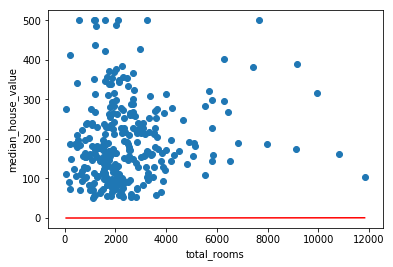

In [14]:
# Valores minimo y maximo del 'total_rooms'.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Recupera el ultimo peso y bias generado durante el entrenamiento
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')


# Recupera el valor predecido para median_house_values pra el minimo y maximo (del paso anterior)
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Escribe etiqueta de la grafica.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Muestra la grafica.
plt.show()

**NOTE:** la linea inicial se ve completamente incorrecta. Mirando la tabla anterior podemos ver que las predicciones tambien estaban en el rango de cero (0.1).  Eso quiere decir que existe la posibilidad que podamos hacer una mejor prediccion ajustando el modelo.


## 4.0 Ajustando hiper-parametros en el Modelo
En este ejercicio hemos movido todo el codigo (arriba) a una sola funcion, por conveniencia. La funcion se puede llamar con diferentes parametros para ver differentes efectos. 

Esta funcion ejecuta en 10 periodos dividos igual de tal manera que podemos observar el progreso en cada periodo

Para cada periodo se haran calculos y graficas mostrando perdida en training (training loss).  Esto puede ayudar a juzgar cuando el modelo ha convergido, o si se requieren mas iteraciones.

La grafica tambien muestra los valores de peso y bias de las observaciones aprendidas por el modelo. (Esta es otra forma de ver el modelo convergiendo)


In [19]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = cal_casas_dataframe[[my_feature]]
  my_label = "median_house_value"
  targets = cal_casas_dataframe[my_label]

  # Crea columnas para las observaciones.
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Crea funciones de entrada.
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Creaun objeto tipo linear regressor.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # alista la grafica para mostar el estado del modelo (linea) en cada periodo
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = cal_casas_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # entrena el modelo, peo lo hace dentro un ciclo que nos permite evaluar periodicamente
  # metricas de perida
  print("Training model...")
  print("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Entrena el modelo, empezando con el estado anterior    
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Para temporalmente y calcula predicciones
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Computa la perdida
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Ocasionalmente imprime la perdida actual
    print("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Adicional las medidas de perdida de este periodo a la lista
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finalmente, mantiene registro de los pesos y bias a traves del tiempo.
    # Aplica calculations para asegurar que los datos y la linea se grafiquen correctamente
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print("Model training finished.")

  # Imprime una grafica con medidas de perdida sober el tiempo
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Imprime una tabla con los datos de calibracion
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print("Final RMSE (on training data): %0.2f" % root_mean_squared_error)

## Ejemplo 1:  Alcanzar un RMSE (Root Mean Squared Error) de 180 o menos

Ajuste los hiperparametros para mejorar la perdida y el ajuste distribucion.  Si despues de 5 minutos usted tiene problemas obteniendo un RMSE < 180 revise la solucion en busca de ideas. 


Training model...
RMSE (on training data):
  period 00 : 236.32
  period 01 : 235.11
  period 02 : 233.90
  period 03 : 232.70
  period 04 : 231.50
  period 05 : 230.31
  period 06 : 229.13
  period 07 : 227.96
  period 08 : 226.79
  period 09 : 225.63
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,13.2,207.3
std,10.9,116.0
min,0.0,15.0
25%,7.3,119.4
50%,10.6,180.4
75%,15.8,265.0
max,189.7,500.0


Final RMSE (on training data): 225.63


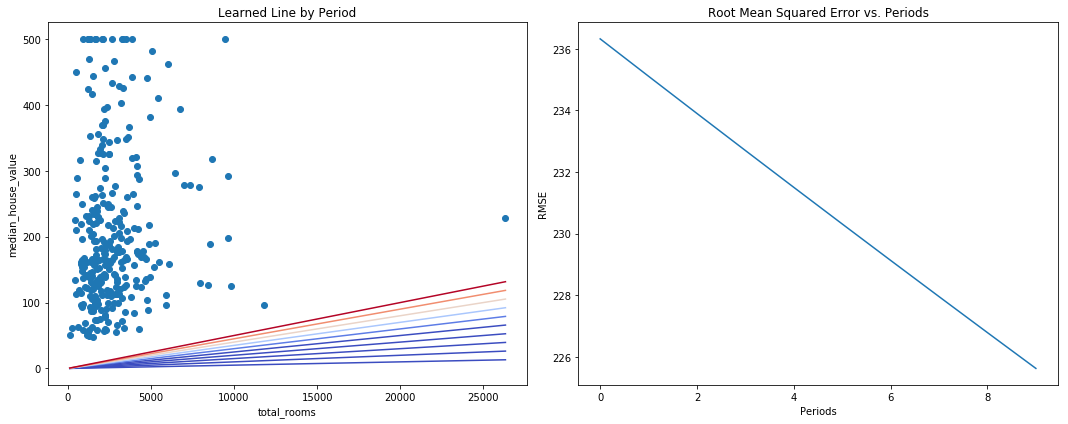

In [20]:
train_model(
    learning_rate=0.00001,
    steps=100,
    batch_size=1
)

Como se puede ver el valor de RMSE es considerablemente alto.  Probemos ahora con la siguiente configuracion: incrementando la rata de aprendizaje (learning_rate), pasos a 500, y tamano del lote a 5.

Training model...
RMSE (on training data):
  period 00 : 216.60
  period 01 : 198.82
  period 02 : 184.63
  period 03 : 175.00
  period 04 : 169.14
  period 05 : 166.42
  period 06 : 166.69
  period 07 : 168.29
  period 08 : 170.16
  period 09 : 171.08
Model training finished.


,predictions,targets
count,17000.0,17000.0
mean,161.8,207.3
std,133.4,116.0
min,0.1,15.0
25%,89.5,119.4
50%,130.2,180.4
75%,192.9,265.0
max,2321.8,500.0


Final RMSE (on training data): 171.08


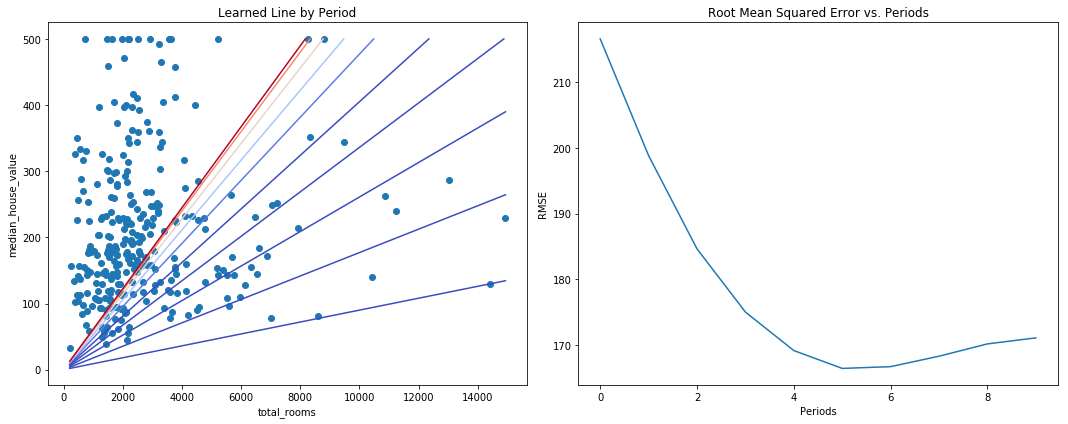

In [23]:
train_model(
    learning_rate=0.00003,
    steps=600,
    batch_size=5
)

En esta configuracion, obtenemos un mejor resultado. Puede haber mejores combinaciones que tambien proveean buenos resultados.  Note que en general, este ejercicio no se trata (en este momento) de encontrar los mejores valores, sino de crear intuicion acerca de como ajustar valores en el modelo que afecten los resultados de la prediccion.
